***

$$
\Large{\textbf{TP Optimisation - 2023}}
$$

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Remove noise from a signal

***

### Question 1 :

Nous voulons réécrire $f(x) = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2 + \frac{\lambda}{2}\sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$ comme 
$\frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$, où $D \in \mathcal{M}_N(\mathbb{R})$.

Le premier terme est évident, car $\frac{1}{2}|| x - y ||^2 = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2$.
Pour le deuxième terme, en prenant :
\begin{equation}
D = 
\begin{pmatrix}
-1&1&0&0&...&0 \\ 0&-1&1&0&...&0 \\ &&...&...&\\ 0&...&0&-1&1&0 \\ 0&...&0&0&-1&1 \\ 0&0&0&0&0&0
\end{pmatrix},
\end{equation}
On obtient : $||Dx||^2 = \sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$, en prenant $||\cdot||^2$ comme la norme euclidienne usuelle.

In [2]:
def D_mat(N):
    D = np.diag(-1*np.ones(N))
    for i in range(N-1):
        D[i,i+1] = 1
    D[N-1,N-1]=0
    return D

***

### Question  2 :

La fonction $||\cdot||$ est différentiable, donc par somme de fonctions différentiables, $f(x) = \frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$ est bien différentiable.

Calcul du gradient : 

Soit $h \in \mathbb{R}^N$.

\begin{align}
f(x+h) &= \frac{1}{2}||x+h-y||^2+\frac{\lambda}{2}||D(x+h)||^2 \\
&= f(x) + \frac{1}{2} \bigg( \langle x-y,h \rangle + \langle h,x-y \rangle + ||h||^2 \bigg) + \frac{\lambda}{2} \bigg( \langle Dx,Dh\rangle + \langle Dh,Dx \rangle + ||Dh||^2 \bigg) \\
&= f(x) + \langle x-y,h \rangle + \lambda\langle Dx, Dh \rangle + \text{o}(||h||^2), \\
\text{D'où} \,\, f(x+h) &= f(x) + \langle x-y + \lambda D^TDx , h \rangle + \text{o}(||h||^2).
\end{align}

Donc on obtient $\nabla f(x) = x-y+\lambda D^TDx = \big(I_d + \lambda D^TD \big)x - y$.

In [3]:
def f(x):
    N = x.shape[0]
    return 1/2*np.linalg.norm(x-y) + lamb/2*np.linalg.norm(D_mat(N)@x)

In [4]:
def grad_f(x):
    N=x.shape[0]
    I = np.eye(N)
    return x + lamb*(D_mat(N).T@D_mat(N))@x - y

***

### Question 3 :

In [5]:
N = 100

In [6]:
def generate_signal(N,sigma=0.05):
    
    t = np.linspace(0,1,N)
    t1 = 0.1+0.25*np.random.random()
    t2 = 0.35+0.25*np.random.random()
    yi = np.array([-0.1,0.8,0.2])
    
    y = np.zeros(N)
    
    for i in range(y.size):
        if t[i]<=t1:
            y[i]=yi[0]
        elif t[i]>t1 and t[i]<=t2:
            y[i] = yi[1]
        else:
            y[i] = yi[2]
    
    y += sigma*(2*np.random.random(y.size)-1)
    
    return t,y

In [7]:
t, y = generate_signal(N)

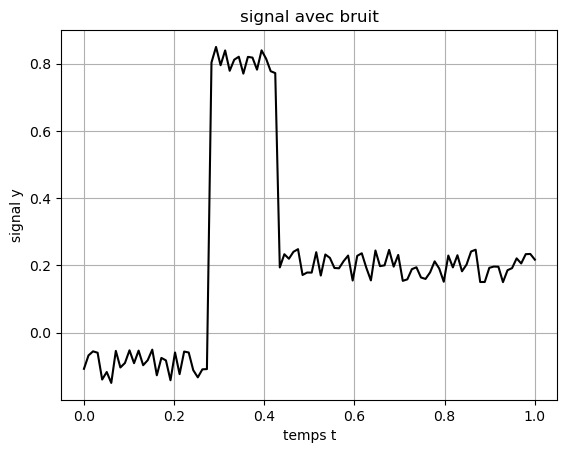

In [8]:
plt.plot(t, y, 'k-')
plt.grid(True)
plt.ylabel('signal y')
plt.xlabel('temps t')
plt.title('signal avec bruit');
plt.show()

***

### Question 4 :

In [10]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f(x)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f(x)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x le minimum trouvé,
                    # iters le nombre d'itération
                    # cvg un booleen qui indique si l'algorithme a convergé

***

### Question 5 :

In [11]:
lamb = 1
x0 = y
alpha = 0.32

In [12]:
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

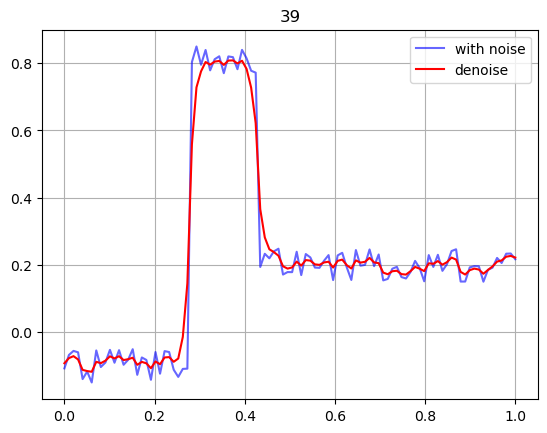

In [13]:
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'denoise')
plt.title(it)
plt.legend()
plt.grid(True)

***

### Question 6 :

Nous pouvons tracer la fonction "nombre d'itérations" en fonction de $\alpha$, afin de trouver le $\alpha$ optimal:

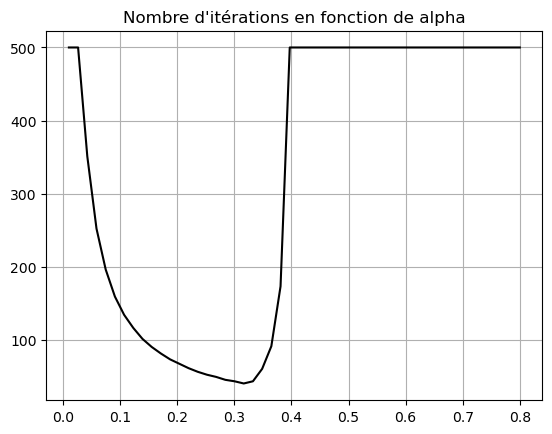

In [14]:
alphaa = np.linspace(0.01,0.8,50)
Nbriterations = []
for alpha in alphaa:
    y_denoise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)
    Nbriterations.append(it)
plt.plot(alphaa, Nbriterations, 'k-')
plt.title("Nombre d'itérations en fonction de alpha")
plt.grid(True)
plt.show()

In [16]:
idx = np.argsort(Nbriterations)
alpha_opti = alphaa[idx][0]
print("On observe une valeur optimale de alpha égale à :", alpha_opti )

On observe une valeur optimale de alpha égale à : 0.3163265306122449


#### Observons ce qu'il se passe lorsque alpha = 0.5, pour lambda = 1:

In [17]:
lamb, alpha = 1, 0.5
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

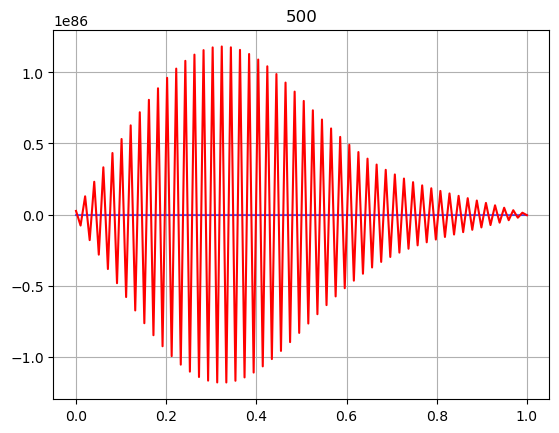

In [18]:
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.title(it)
plt.grid(True)

Ce résultat est attendu. En effet, d'après les observations précédentes sur $\alpha$, on remarque que (à $\lambda = 1$ fixé) si $\alpha \geq 0.4$, alors le nombre d'itérations dépasse 500 et le modèle ne converge pas.

Nous pouvons aussi faire un lien avec le cours: la théorie assure que $0 \leq \alpha \leq \frac{2}{M},$ $J$ étant de gradient Lipschitz de constante $M$, ie 

$$
\forall (x,y) \in \mathbb{R}^{n\times n}, \,\,\, ||\nabla J(x) - \nabla J(y)|| \leq M ||x - y||
$$

In [19]:
M=np.sum(np.abs(np.eye(N) + lamb*D_mat(N).T@D_mat(N)))/N   ## calcul de M:
alpha_max = 2/M    ###valeur maximale que alpha peut prendre

print("La valeur de alpha maximale est:", alpha_max)

La valeur de alpha maximale est: 0.40322580645161293


Théoriquement, il faut donc que alpha soit plus petit que 0.4 pour qu'il y ai convergence. Cette affirmation est en accord avec ce que l'on observe graphiquement.

***

### Question 7 :

Nous allons faire varier $\lambda$ entre 1 et 4, et observer les différents débruitages :

**Remarque** : pour chaque lambda, nous utiliserons un alpha le plus optimal possible, ie $\alpha = \frac{2}{M} - 0.05$ (fonctionne bien).

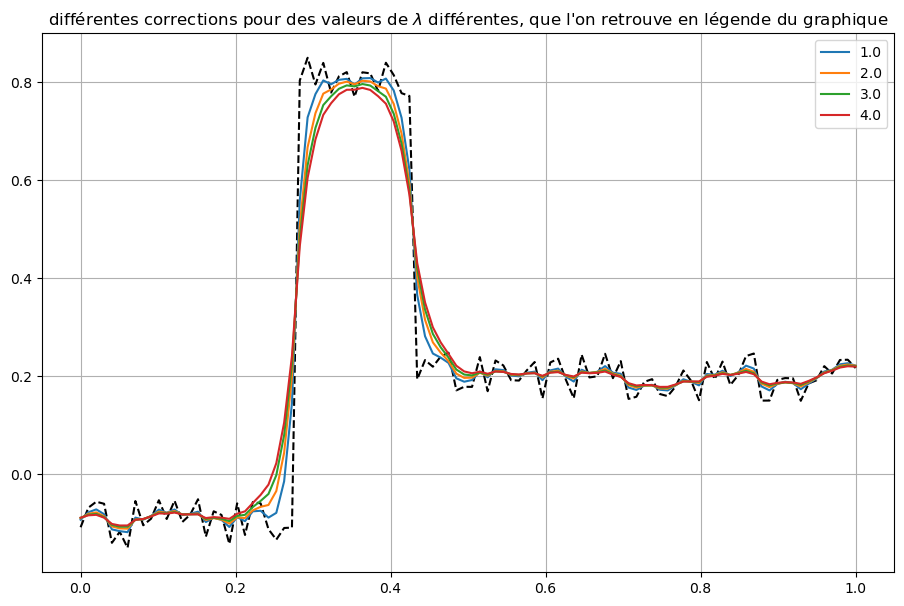

In [21]:
lambdaa = np.linspace(1,4,4)

fig = plt.figure(figsize = (11,7))
plt.plot(t,y,'k--')
for l in lambdaa:
    lamb = l
    M=np.sum(np.abs(np.eye(N) + lamb*D_mat(N).T@D_mat(N)))/N
    alpha_opti = 2/M - 0.05
    y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha_opti, 1e-5, 500)
    plt.plot(t, y_non_noise, label = l)

plt.title(r"différentes corrections pour des valeurs de $\lambda$ différentes, que l'on retrouve en légende du graphique")
plt.grid(True)
plt.legend()
plt.show()

**Observations** : lorsque $\lambda$ augmente, le signal est de plus en plus corrigé. Il faut néanmoins faire attention à ne pas perdre trop d'informations sur le signal, et éviter de le "sur-lissage". 

***

### Question 8 :

Pour calculer le gradient de cette nouvelle fonction $f_{\mu}$, nous allons raisonner avec les dérivées partielles, une à une.
Montrons d'abord qu'elles existent :
$$
f_{\mu} = \frac{1}{2} \sum_{i=1}^N(x_i - y_i)^2 + \lambda \sum_{i=1}^{N-1} \sqrt{(x_{i+1}-x_i))^2 + \mu^2 }
$$
$(x_{i+1}-x_i))^2 + \mu^2$ est polynomial en $x_i$, donc $\sqrt{(x_{i+1}-x_i))^2 + \mu^2}$ est différentiable, puis par sommes de fonctions différentiables, $\lambda \sum_{i=1}^{N-1} \sqrt{(x_{i+1}-x_i))^2 + \mu^2 }$ est différentiable.

De plus, $\sum_{i=1}^N(x_i - y_i)^2 = ||x-y||_2^2 $ et $||\cdot||_2$ est différentiable, donc au total, la fonction $f_{\mu}$ est bien différentiable, et admet bien des dérivées partielles en tous les $x_i$. 


Calcul des dérivées partielles:

soit $l \in \{2,...,N-1\}$. Alors :
$$
\frac{\partial f(x)}{\partial x_l} = x_l - y_l - \lambda \frac{x_{l+1} - x_l}{\sqrt{(x_{l+1}-x_l)^2+\mu^2}} + \lambda\frac{x_l-x_{l-1}}{\sqrt{(x_l-x_{l-1})^2+\mu^2}}
$$
Pour $l = N$ :
$$
\frac{\partial f(x)}{\partial x_N} = x_N - y_N + \lambda \frac{x_{N} - x_{N-1}}{\sqrt{(x_{N}-x_{N-1})^2+\mu^2}}
$$
Enfin, pour $l=1$:
$$
\frac{\partial f(x)}{\partial x_1} = x_1 - y_1 - \lambda \frac{x_{2} - x_{1}}{\sqrt{(x_{2}-x_{1})^2+\mu^2}}
$$
Au total, on obtient : 
$$
\nabla f_{\mu}(x) = \bigg(\frac{\partial f(x)}{\partial x_i} \bigg)_{i=1,...,N}.
$$

In [22]:
def grad_f_mu(x, mu):
    
    N = x.shape[0]
    gradf = np.zeros(N)
    
    for i in range(1,N-1):
        gradf[i] = x[i] - y[i] - lamb*(x[i+1]-x[i])/np.sqrt((x[i+1]-x[i])**2 + mu**2) + lamb*(x[i]-x[i-1])/np.sqrt((x[i]-x[i-1])**2 + mu**2)
    
    gradf[0] = x[0] - y[0] - lamb*(x[1]-x[0])/np.sqrt((x[1]-x[0])**2 + mu**2)
    gradf[N-1] = x[N-1] - y[N-1] + lamb*(x[N-1]-x[N-2])/np.sqrt((x[N-1]-x[N-2])**2 + mu**2)
    
    return gradf

***

### Question 9 :

In [23]:
def gradient_met_mu(grad_f_mu, x0, mu, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f_mu(x, mu)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f_mu(x, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [39]:
x0 = y
lamb = 1
alpha =  0.001

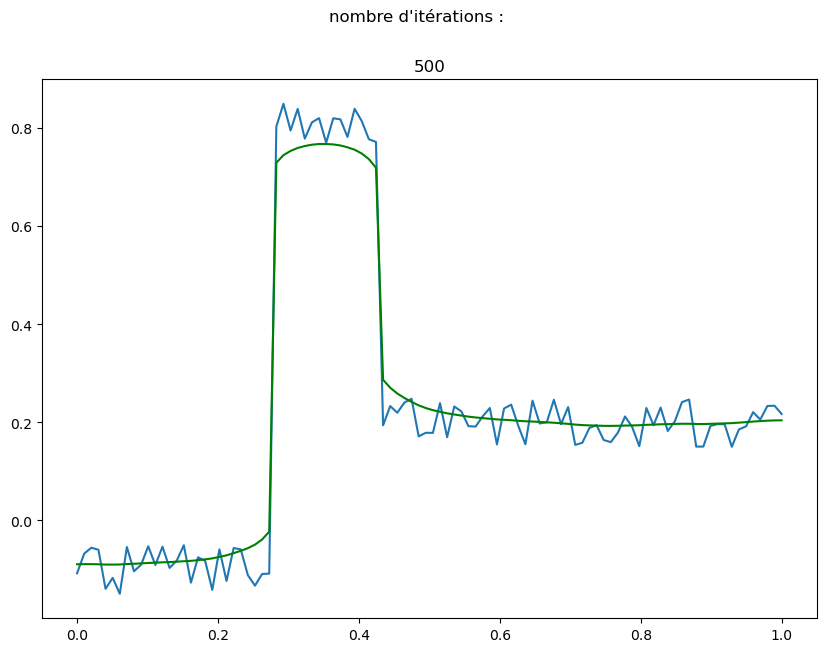

In [40]:
#plt.plot(t,y_non_noise, 'b-')
y_new, n, cvg = gradient_met_mu(grad_f_mu, x0, 1e-2, alpha, 1e-4,500)
fig = plt.figure(figsize=(10,7))
plt.plot(t,y)
plt.plot(t,y_new, 'g-')
plt.suptitle("nombre d'itérations :")
plt.title(it)
plt.show()

La deuxième méthode lisse beaucoup plus le signal. Plus efficace, même trop.

### Question 10 :

In [41]:
def BBstep(grad_f, x, xm1) :
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization point x_0
    xm1 the initialization point x_-1
    """
    bbs = (x-xm1).T@(grad_f(x)-grad_f(xm1))/np.linalg.norm(grad_f(x)-grad_f(xm1))**2
    
    return bbs # the step in the method of Barzilai-Borwein

In [42]:
def barzilai_borwein(grad_f, x0, eps, Nmax):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    x = x0
    xm1 = -x0
    
    gradf = grad_f(x)
    iters = 0
    alpha = BBstep(grad_f, x, xm1)
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        xm1 = x
        x = xm1 - alpha*grad_f(xm1)
        gradf = grad_f(x)
        alpha = BBstep(grad_f, x, xm1)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    n = iters
    
    return x, n, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [43]:
x0 = y
lamb = 4

y_1, n3, cvg3 = barzilai_borwein(grad_f, x0, 1e-8, 100)
n3, cvg3

(44, True)

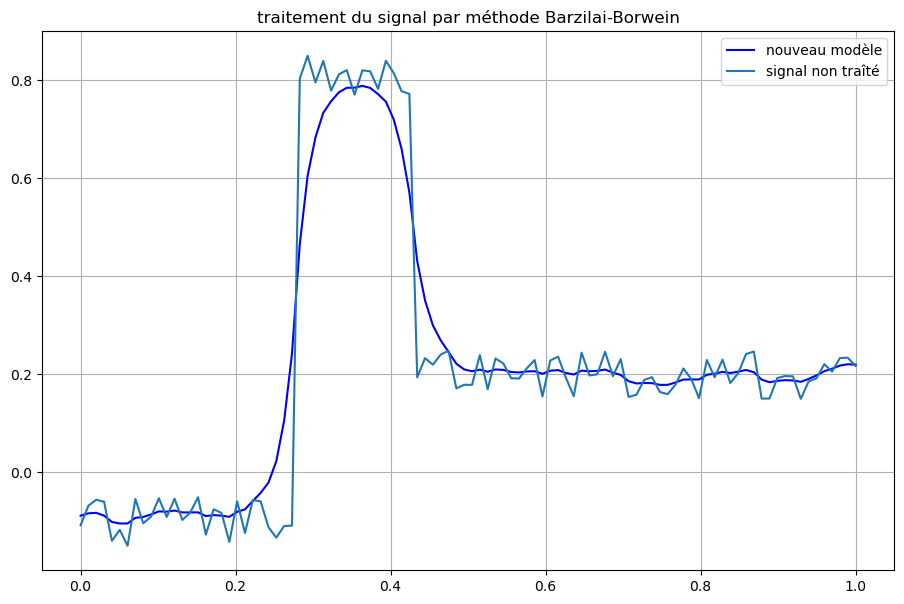

In [44]:
fig = plt.figure(figsize = (11,7))
plt.plot(t,y_1,'b-', label = 'nouveau modèle')
plt.plot(t,y, label = 'signal non traîté')
plt.grid(True)
plt.title("traitement du signal par méthode Barzilai-Borwein")
plt.legend()
plt.show()

Méthode de gradient à pas non fixe, optimal à chaque itérations, la descente est plus précise et plus rapide, on s'attend théoriquement à un meilleur résultat que précédemment, ce qui est vérifié ce-dessus.

***

***

# Exercice 2 : Remove noise from an image

**Remarque essentielle**:

Pour comparer les résultats entre l'image g et l'image corrigée, j'ai quelques fois utilisé des GIF, donc si vous exécutez toutes les cellules, il faudra sûrement changer les $\textit{"file directory"}$ dans $\textit{Image(filename = "...")}$.

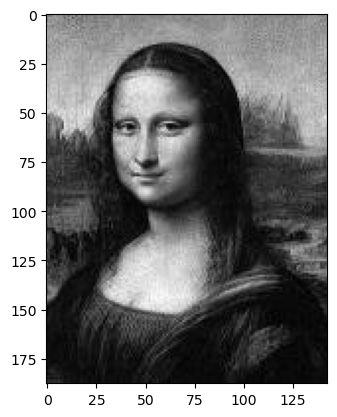

In [45]:
from matplotlib.image import imread
image = imread("C:/Users/Emilio/Documents/Projet master/Grey_Mona_lisa.jpg") ##Ici, mon ordinateur ne trouvait pas l'image
                                                                             ##  si je ne mettais pas le dossier entier.
                                                                            ## Veuillez s'il vous plaît le changer pour que cela fonctionne
imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

***

### Question 1 :

$\forall u \in \mathbb{R}^{m \times n}$
\begin{cases}
\delta_x(u) = D_x u \\
\delta_y(u) = u D_y
\end{cases}
avec $D_x \in \mathcal{M}_m(\mathbb{R})$ et $ D_y\in \mathcal{M}_n(\mathbb{R})$

In [46]:
def delta_x(u): # like the matrix Dx above, in the first exercise, but for the x direction
    m, n = u.shape[0], u.shape[1]
    delt = -1*np.eye(m)

    for i in range(m-1):
            delt[i,i+1] = 1
    delt[m-1,m-1] = 0
    return delt

def delta_y(u): #the matrix Dy above
    m, n = u.shape[0], u.shape[1]
    delt = -1*np.eye(n)

    for i in range(n-1):
            delt[i,i+1] = 1
    delt[n-1,n-1] = 0
    return delt.T

In [47]:
m = g.shape[0]
n = g.shape[1]

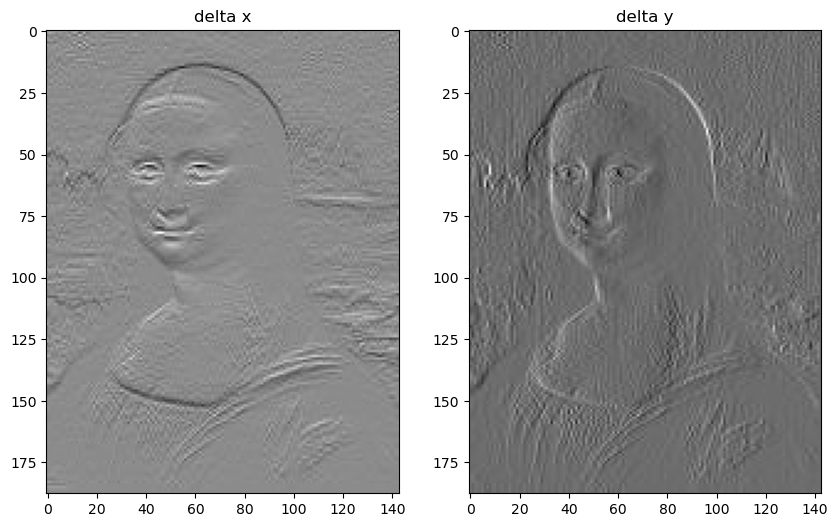

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,25))
ax1.imshow(delta_x(g)@g,cmap='gray')
ax1.set_title("delta x")
ax2.imshow(g@delta_y(g),cmap='gray')
ax2.set_title("delta y")
plt.show()

***

### Question 2 :

Ici, nous utliserons ceci :

$$
||\nabla^d(v)|| = ||(\delta_x(v),\delta_y(v))|| = \sqrt{||\delta_x(v)||^2 + ||\delta_y(v)||^2}
$$

In [49]:
def M_mat(u): return np.sqrt((delta_x(u)@u)**2 + (u@delta_y(u))**2)

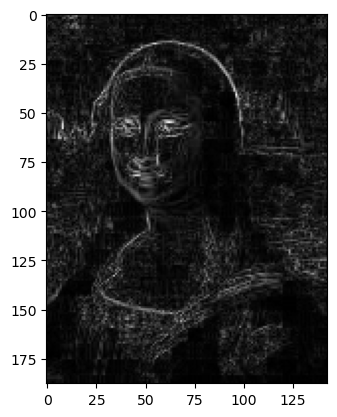

In [50]:
plt.imshow(M_mat(g), cmap='gray')

plt.show()

##### Remarques :
Après traîtement du dessus, l'image s'affiche en noir et blanc, il n'y a plus de nuances de gris.  

***

### Question 3 :

D'après la question 2, nous pouvons affirmer :
$$
||\nabla ^d(v)||^2 = ||\delta_x(u)||^2 + ||\delta_y(u)||^2 
$$


On cherche à minimiser $J(v) = \frac{1}{2}|| v - g ||^2 + \frac{\lambda}{2} ||\nabla^d(v)||^2$, $v \in \mathbb{R}^{m\times n}$.

On peut montrer que $J$ est $C^1$. En fait, on va montrer que $J$ est polynomiale par rapport aux variables $v_{i,j}, \,\, i \in {1,...,m},\,\,j \in {1,...,n}$.

\begin{align}
J(v) = \frac{1}{2}|| v - g ||^2 + \frac{\lambda}{2} ||\nabla^d(v)||^2 &=\frac{1}{2}\sum_{i,j}(v-g)_{i,j}^2 + \frac{\lambda}{2}\sum_{i,j}(D_xv)_{i,j}^2 + (vD_y)_{i,j}^2 \\
&= \frac{1}{2}\sum_{i,j}(v_{i,j}-g_{i,j})^2 \frac{\lambda}{2}\sum_{i \ne m,j \ne n}\bigg(v_{i+1,j}-v_{i,j})^2 + (v_{i,j+1}-v_{i,j})^2 \bigg) + \sum_{j=1}^{n-1}(v_{m,j+1}-v_{m,j})^2 + \sum_{i = 1}^{m-1}(v_{i+1,n}-v_{i,n})^2
\end{align}

$J$ est donc polynomiale par rapport aux variables $v_{i,j}$, donc $\mathcal{C}^{\infty}$, en particulier $\mathcal{C}^1$.

En utilisant la formule en début de paragraphe, on obtient simplement que $\nabla ||\nabla ^d(v)||^2 = 2D_x^TD_xu + 2 u D_y D_y^T$

Et comme $\nabla(\frac{1}{2}||v-g||^2) = \frac{1}{2} \times 2 \times (v-g)$, on a donc une formule explicite du gradient :

$$
\nabla J(v) = v - g + \lambda \big( D_x^TD_xu + u D_y D_y^T \big)
$$

On pourra montrer que $J$ est également strictement convexe, et que $J$ est à gradient Lipschitz, ce qui nous assure que la descente de gradient ainsi réalisée converge vers un unique minimiseur, lorsque $\alpha \in \,\, ]0;\frac{2}{M}[$, avec $M$ la constante de Lipschitz du gradient de $J$.

In [51]:
def grad_J(v): #gradient de J
    return  v - g + lamb*(delta_x(v).T@delta_x(v)@v + v@delta_y(v)@delta_y(v).T)

In [52]:
def grad_met_im(grad_J, v0, alpha, eps = 1e-3, Nmax = 500):
    """
    grad_J a function that compute the gradient of J given v, the image. (m,n)-matrix
    v0 the initialization, (m,n)-matrix
    alpha the step (constant)
    """
    v = v0
    gradj = grad_J(v)
    iters = 0

    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        v = v - alpha*gradj
        gradj = grad_J(v)
        iters += 1
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence

    return v, iters, cvg
    

Il peut être intéressant de comparer comme dans l'exercice 1, à $\lambda$ fixé, la valeur maximale que peut prendre alpha pour qu'il y ait convergence.

In [54]:
lamb = 3
v0 = np.zeros((m,n))

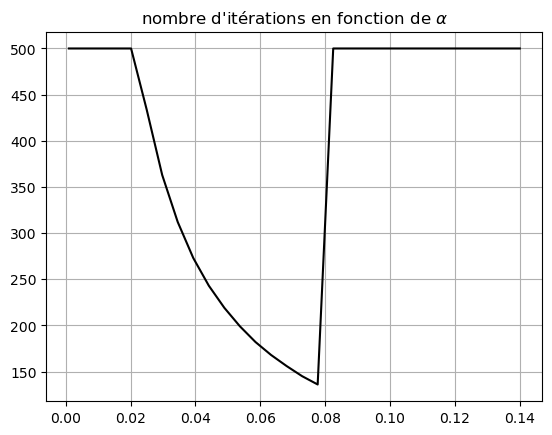

In [55]:
alphaa = np.linspace(0.001, 0.14, 30)
Nbriterations = []
for alpha in alphaa:
    y=g_denoise, it, cvg = grad_met_im(grad_J, v0, alpha)
    Nbriterations.append(it)
plt.plot(alphaa, Nbriterations, 'k-')
plt.grid(True)
plt.title(r"nombre d'itérations en fonction de $\alpha$")
plt.show()

In [56]:
idx = np.argsort(Nbriterations)
alpha_opti = alphaa[idx][0]
print("alpha optimal = ", alpha_opti)

alpha optimal =  0.0776896551724138


Maintenant, on calcule la valeur $\dfrac{2}{M}$, valeur maximale que peux prendre $\alpha$ théoriquement :

In [57]:
M=np.sum(np.abs(np.eye(g.shape[0]) + lamb*delta_x(g).T@delta_x(g)))/m + np.sum(np.abs(lamb*delta_y(g)@delta_y(g).T))/n

print("2/M = ", 2/M)

2/M =  0.08047559749030127


Les valeurs correspondent parfaitement.

Comparons maintenant différents résultats pour des $\lambda$ différents :

In [58]:
lambdaa = np.linspace(0.1,4,6)
alpha = [1.109, 0.20, 0.109, 0.077, 0.0591, 0.045 ] ### toutes les valeurs à peu près optimales de alpha pour chaque lambda ci-dessus
v0 = np.zeros((m,n))

lamb=lambdaa[0]
g_new1, it1, cvg = grad_met_im(grad_J, v0, alpha[0])
lamb = lambdaa[1]
g_new2, it2, cvg = grad_met_im(grad_J, v0, alpha[1])
lamb=lambdaa[2]
g_new3, it3, cvg = grad_met_im(grad_J, v0, alpha[2])
lamb=lambdaa[3]
g_new4, it4, cvg = grad_met_im(grad_J, v0, alpha[3])
lamb=lambdaa[4]
g_new5, it5, cvg = grad_met_im(grad_J, v0, alpha[4])
lamb=lambdaa[5]
g_new6, it6, cvg = grad_met_im(grad_J, v0, alpha[5])

In [60]:
import matplotlib.image
import imageio
from IPython.display import Image

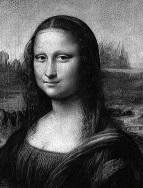

In [61]:
matplotlib.image.imsave('Mona_bruit.png', g, cmap='gray')
matplotlib.image.imsave('Mona1.png', g_new1, cmap='gray')
matplotlib.image.imsave('Mona2.png', g_new2, cmap='gray')
matplotlib.image.imsave('Mona3.png', g_new3, cmap='gray')
matplotlib.image.imsave('Mona4.png', g_new4, cmap='gray')
matplotlib.image.imsave('Mona5.png', g_new5, cmap='gray')
matplotlib.image.imsave('Mona6.png', g_new6, cmap='gray')

filenames = ["Mona_bruit.png", "Mona1.png","Mona2.png","Mona3.png","Mona4.png","Mona5.png","Mona6.png"]
img=[]

for filename in filenames:
    img.append(imageio.v2.imread(filename))
imageio.mimsave('MONA_lambda.gif', img, 'GIF', duration=0.7)

Image(filename="C:/Users/Emilio/Documents/Projet master/Optimisation/MONA_lambda.gif")

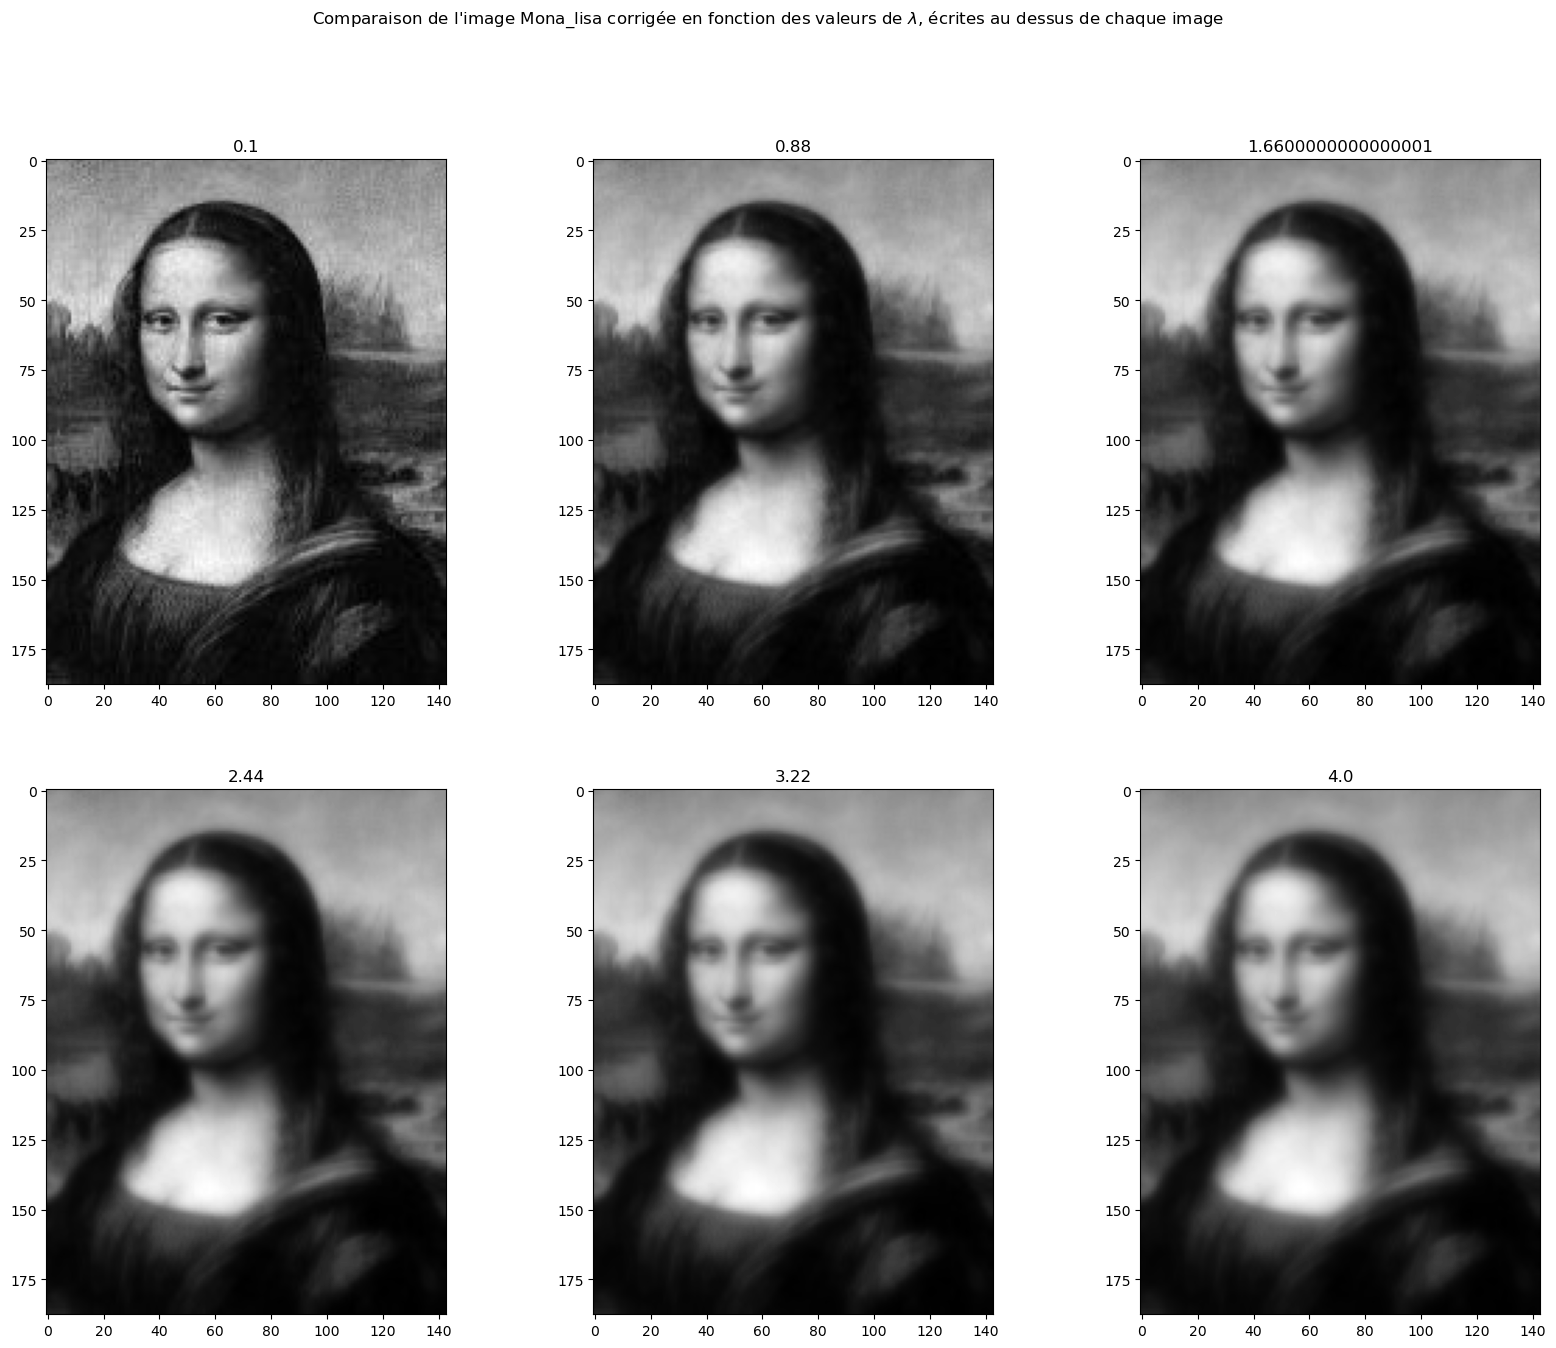

In [62]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2,figsize=(20,15))

ax1.imshow(g_new1, cmap='gray')
ax1.set_title(lambdaa[0])

ax2.imshow(g_new2, cmap='gray')
ax2.set_title(lambdaa[1])

ax3.imshow(g_new3, cmap='gray')
ax3.set_title(lambdaa[2])

ax4.imshow(g_new4, cmap='gray')
ax4.set_title(lambdaa[3])

ax5.imshow(g_new5, cmap='gray')
ax5.set_title(lambdaa[4])

ax6.imshow(g_new6, cmap='gray')
ax6.set_title(lambdaa[5])

fig = plt.suptitle(r"Comparaison de l'image Mona_lisa corrigée en fonction des valeurs de $\lambda$, écrites au dessus de chaque image")

plt.show()

#### Remarques :

Lorsque l'on augmente $\lambda$, l'image devient de plus en plus lisse, ce qui la rend visuellement flou. Le bruit est mieux traîté à partir de $\lambda = 2$. On peut cependant parler de "sur-lissage" pour $\lambda = 5$ par exemple.

***

#### Question 4 :

Gradient de $J$ pour le cas où on rajoute un terme $\mu$ dans le fonction $J$:

La fonction J devient :
$$J_{\mu}(v) = \frac{1}{2} ||v - g||^2 + \frac{\lambda}{2}||\nabla^d(v),\mu||^2,$$
avec la notation $||\nabla^d(v),\mu||^2 = ||(u,\mu),(v,\mu)||^2$.

On utilise le fait que: $ \forall (u,v), \, \forall \mu \in \mathbb{R} , \, ||(u,\mu),(v,\mu)||^2 = ||(u,\mu)||^2 + ||(v,\mu)||^2$.

Ainsi, on obtient:

$$||\nabla^d(v),\mu||^2 = ||(\delta_x(v),\mu), (\delta_y(v),\mu)||^2 = \sum_{i,j} \bigg( \sqrt{\delta_x(v)_{i,j}^2 + \mu^2} + \sqrt{\delta_y(v)_{i,j}^2 + \mu^2} \bigg)$$

Finalement, pour le calcul du gradient, on otbient une forme explicite de celui-ci : 

Notons
\begin{equation}
M_y(v) = 
\begin{pmatrix}&&&&&0 \\ &&&&&0 \\ &&(vD_y)_{i,j}&&&0\\ &&&&&0 \\ &&&&&0 \\ &&&&&0
\end{pmatrix},
\text{où l'on a remplacé la dernière colonne de} \,\, (vD_y) \,\, \text{par une colonne de 0},
\end{equation}
et 


\begin{equation}
M_x(v) = 
\begin{pmatrix}&&&&& \\ &&&&& \\ &&(D_xv)_{i,j}&&&\\ &&&&& \\ &&&&& \\ 0&0&0&0&0&0
\end{pmatrix},
\text{où l'on a remplacé la dernière ligne de} \,\, (D_xv) \,\, \text{par une ligne de 0}.
\end{equation}

Alors :
$$
\nabla||\nabla^d(v),\mu|| = \dfrac{-vD_y}{\sqrt{(vD_y)^2 + \mu^2}} - \dfrac{D_xv}{\sqrt{(D_xv)^2 + \mu^2}} + \dfrac{M_y(v)}{\sqrt{M_y(v)^2 + \mu^2}} + \dfrac{M_x(v)}{\sqrt{M_x(v)^2 + \mu^2}}\,\,\,.
$$

In [63]:
def grad_J_mu(u, mu):
    
    m=u.shape[0]
    n=u.shape[1]
    mat_grad = np.zeros((m,n))
    
    first_term = -u@delta_y(u)/np.sqrt((u@delta_y(u))**2 + mu**2) 
    
    mat_2 = np.concatenate((np.zeros((m,1)),np.delete(u@delta_y(u),-1,1)),axis = 1)
    sec_term = mat_2/np.sqrt(mat_2**2+mu**2)
    
    third_term = -delta_x(u)@u/np.sqrt((delta_x(u)@u)**2+mu**2)
    
    mat_4 = np.concatenate((np.zeros((1,n)), np.delete(delta_x(u)@u,-1,0)), axis = 0)
    four_term = mat_4/np.sqrt(mat_4**2+mu**2)
    
    return u - g + lamb/2*(first_term + sec_term + third_term + four_term)

Nouvel algorithme de descente de gradient pour $J_{\mu}$ :

In [64]:
def grad_met_im_mu(grad_J_mu, v0, alpha, mu = 1e-2, eps = 1e-4, Nmax = 500):
    """
    grad_J a function that compute the gradient of J_mu given v, the image. (m,n)-matrix
    v0 the initialization, (m,n)-matrix
    alpha the step (constant)
    """
    v = v0
    gradj = grad_J_mu(v, mu)
    iters = 0

    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        v = v - alpha*gradj
        gradj = grad_J_mu(v, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence
    return v, iters, cvg

Interprétation graphique : On fixe $\lambda = 0.1$, puis on cherche la valeur de alpha optimale:

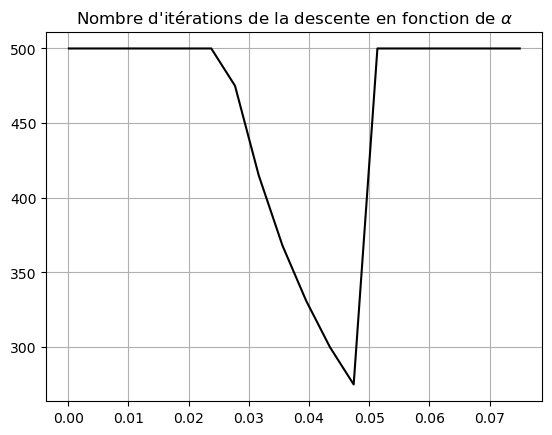

In [65]:
lamb =0.1
alphaa = np.linspace(0.0001,0.075,20)
Nbiter = []
for alpha in alphaa:
    g_den, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)
    Nbiter.append(it)
plt.plot(alphaa,Nbiter,'k-')
plt.grid(True)
plt.title(r"Nombre d'itérations de la descente en fonction de $\alpha$")
plt.show()

Une fois la valeur optimale de alpha trouvée, on cacule la descente de gradient avec $\lambda =0.1$ et $\alpha_{optimal}$:

In [67]:
lamb = 0.1
idx = np.argmin(Nbiter)
alpha = alphaa[idx]
g_denoise, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)

nombre d'itérations de la descente : 275 | Convergence : True


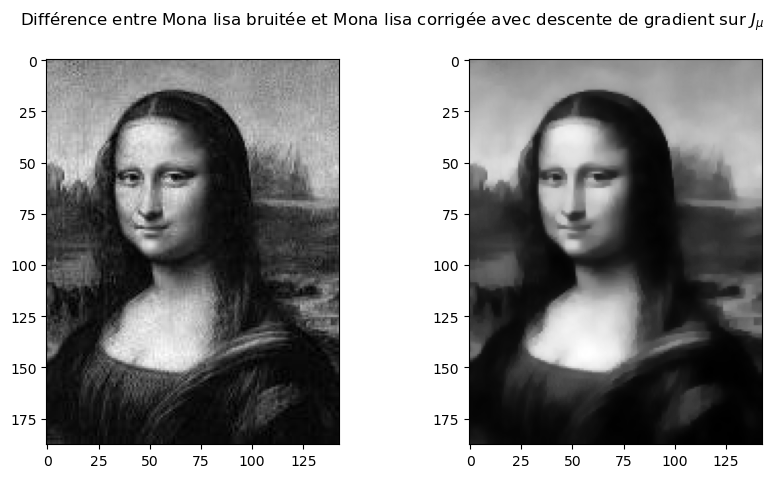

In [68]:
print("nombre d'itérations de la descente :", it, "| Convergence :", cvg)
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
ax1.imshow(g, cmap='gray')
ax2.imshow(g_denoise, cmap='gray')
fig = plt.suptitle(r'Différence entre Mona lisa bruitée et Mona lisa corrigée avec descente de gradient sur $J_{\mu}$')
plt.show()

#### Remarques :

L'image corrigée est bien débruitée, avec une sensation plus lisse que la méthode précédente, sans le flou. On observe des problèmes de "staircases", des escaliers au niveau des bords, par exemple au niveau de la délimitation des cheveux de Mona_lisa. Ce sont des problèmes récurrents en traitement d'image.

***

### Question 5 :

#### a)

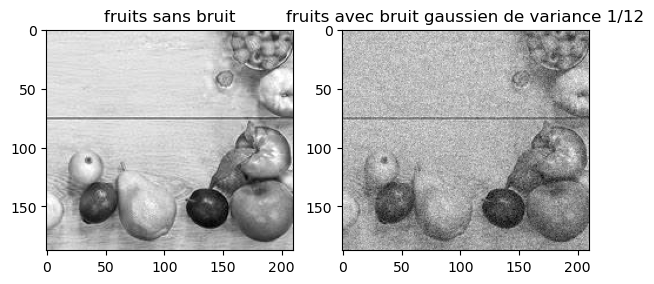

In [70]:
image = imread("C:/Users/Emilio/Documents/Projet master/OIP.jpeg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

g0=imageArray.copy()[150:,250:460]
g = g0 + 1/12*np.random.randn(g0.shape[0],g0.shape[1])

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(7,10))
ax1.imshow(g0, cmap='gray')
ax2.imshow(g, cmap='gray')
ax1.set_title("fruits sans bruit")
ax2.set_title("fruits avec bruit gaussien de variance 1/12")
plt.show()

#### b)

1ère méthode, implémentation de la descente avec $J$ et grad_J :

In [71]:
lamb=3
M=np.sum(np.abs(np.eye(g.shape[0]) + lamb*delta_x(g).T@delta_x(g)))/g.shape[0] + np.sum(np.abs(lamb*delta_y(g)@delta_y(g).T))/g.shape[1]
alpha=2/M
v0 = np.zeros((g.shape[0],g.shape[1]))

g_denoise_1, it, cvg = grad_met_im(grad_J, v0, alpha)

**Nous  allons comparer la différence entre les fruits nets et les fruits corrigés à l'aide d'un Gif :**

Pour lambda = 3 et alpha optimal, on observe : Convergence ? False | Nombre d'itérations : 500


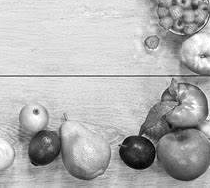

In [72]:
print('Pour lambda =', lamb,'et alpha optimal, on observe :', 'Convergence ?', cvg ,"| Nombre d'itérations :", it)

matplotlib.image.imsave('input_g.png', g0, cmap='gray')
matplotlib.image.imsave('out1_g.png', g_denoise_1, cmap='gray')

filenames = ["input_g.png", "out1_g.png"]
img=[]

for filename in filenames:
    img.append(imageio.v2.imread(filename))
imageio.mimsave('fruit_0.gif', img, 'GIF', duration=1)

Image(filename="C:/Users/Emilio/Documents/Projet master/Optimisation/fruit_0.gif")

2ère méthode, implémentation de la descente avec $J_{\mu}$ et grad_J_mu : On choisit lambda et alpha comme ceux de Mona Lisa pour simplifier les calculs:

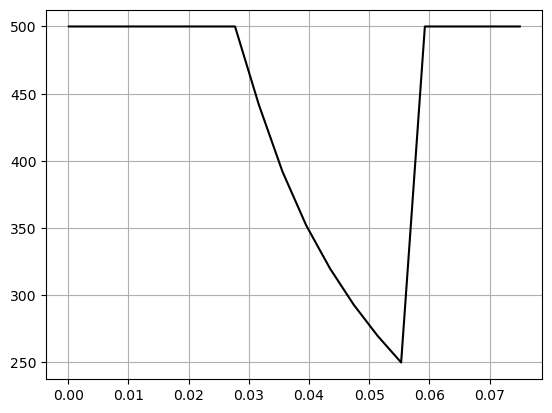

In [73]:
lamb = 0.1
alphaa = np.linspace(0.0001,0.075,20)
Nbiter = []
for alpha in alphaa:
    g_den, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)
    Nbiter.append(it)
plt.plot(alphaa,Nbiter,'k-')
plt.grid(True)
plt.show()

In [74]:
idx = np.argmin(Nbiter)
alpha_opt = alphaa[idx]
g_denoise_2, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha_opt)

In [75]:
matplotlib.image.imsave('out_g.png', g_denoise_2, cmap='gray')

filenames = ["input_g.png", "out_g.png"]
img=[]

for filename in filenames:
    img.append(imageio.v2.imread(filename))
imageio.mimsave('fruit.gif', img, 'GIF', duration=1)

Pour lambda = 0.1 et alpha optimal = 0.05528947368421053 , on observe : Convergence ? True | Nombre d'itérations : 250
Différence entre l'image nette et l'image corrigée par la descente sur J_mu :


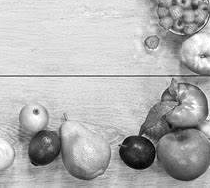

In [76]:
print("Pour lambda =", lamb,'et alpha optimal =', alpha_opt,', on observe :', 'Convergence ?', cvg ,"| Nombre d'itérations :", it)
print("Différence entre l'image nette et l'image corrigée par la descente sur J_mu :")

Image(filename="C:/Users/Emilio/Documents/Projet master/Optimisation/fruit.gif")

On observe quand même une meilleure correction qu'avec la première méthode.

Comparons à la suite les deux méthodes avec l'image nette :

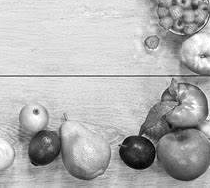

In [77]:
filenames = ["input_g.png", "out1_g.png", "out_g.png"]
img=[]

for filename in filenames:
    img.append(imageio.v2.imread(filename))
imageio.mimsave('fruit_tot.gif', img, 'GIF', duration=1)

Image(filename="C:/Users/Emilio/Documents/Projet master/Optimisation/fruit_tot.gif")

La deuxième méthode corrige mieux le bruit.

#### c) 

Comparaison entre l'image nette et l'image débruitée avec les deux méthodes: Nous allons observer l'image $|g - g_{denoise}|$: si cette image se rapproche d'une image toute noire (pixel noir codé avec des 0), alors le débruitage aura bien marché.

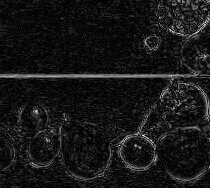

In [78]:
diff_0 = np.abs(g_denoise_1-g0)
diff_1 = np.abs(g_denoise_2-g0)

matplotlib.image.imsave('diff0.png', diff_0, cmap='gray')
matplotlib.image.imsave('diff1.png', diff_1, cmap='gray')

filenames = ["diff0.png", "diff1.png"]
img=[]

for filename in filenames:
    img.append(imageio.v2.imread(filename))
imageio.mimsave('différence.gif', img, 'GIF', duration=1)

Image(filename="C:/Users/Emilio/Documents/Projet master/Optimisation/différence.gif")

**Remarque** : l'image avec le trait blanc visible au milieu est la méthode avec $J$, l'autre avec $J_{\mu}$.
Pour un très bon résultat, il faudrait une image qui approche un carré noir, ie des pixels codés avec un 0, entre 0 et 255. 
Par conséquent, les deux méthodes semblent assez bien traîter l'image. 

On peut remarquer que la première méthode a plus de mal au niveau des changements de nuances, c'est pour cela que l'on observe un trait blanc ci-dessus. L'autre méthode semble plus uniforme, bien que les noirs soient moins profond que la première méthode.

## Ouverture :

Pour des images (dimension p = 2) réelles comme celles-ci, la méthode de desente de gradient peut être vue comme particulièrement adaptée par rapport à d'autres modèles de traitements d'image. En effet, nous pouvons essayer de corriger du bruit blanc gaussien avec des méthodes statistiques.

Par exemple, Pour un modèle de bruit blanc gaussien à représentation sparse, une base orthonormée est utilisée, et en fonction de cette base, nous pouvons obtenir de plus ou moins bons résultats. 

Pour des images comme celles étudiées ci-dessus, une base cosinus ou encore base de Haar débruite beaucoup moins bien ces images que la descente de gradient étudiée dans ce TP. 

Néanmoins, nous pouvons trouver d'autres types bases comme les bases d'ondelettes qui sont elles plus adaptées, et par ailleurs très utilisées.